**Общая информация**

**Срок сдачи:** 21 октября 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [42]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [43]:
from scipy.spatial.distance import minkowski
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import KDTree

class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric="minkowski"):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
        self.scaler = StandardScaler()
    
    def fit(self, X, y):
        self.X = self.scaler.fit_transform(X)
        self.y = y
    
    def predict(self, X):
        n = self.X.shape[0]
        m = X.shape[0]
        X = self.scaler.transform(X)
        if self.algorithm == "brute":
            #Minkowski metric with parameter p=2 is default for pairwise_distances
            if(self.metric == "cosine"):
                metrics = pairwise_distances(X, self.X, metric=self.metric)
            else:
            #using default metric, the function works faster
                metrics = pairwise_distances(X, self.X)
            top_indices = np.argpartition(metrics, self.n_neighbors, axis = 1)[:,:self.n_neighbors]
        elif self.algorithm == "kd_tree":
            if(self.metric == "cosine"):
                top_indices = KDTree(self.X, metric="cosine").query(X, k = self.n_neighbors, return_distance = False)
            else:
                top_indices = KDTree(self.X).query(X, k = self.n_neighbors, return_distance = False)
        labels = np.take_along_axis(np.repeat(self.y[np.newaxis], m, axis = 0), top_indices, axis = 1)
        y = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis = 1, arr = labels)
        return y   
            
    

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [49]:
iris = datasets.load_iris()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [51]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [52]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [53]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [54]:
%time clf.fit(X_train, y_train)

Wall time: 987 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [55]:
%time my_clf.fit(X_train, y_train)

Wall time: 1.23 ms


In [56]:
%time clf.predict(X_test)

Wall time: 4.01 ms


array([1, 1, 0, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 1])

In [57]:
%time my_clf.predict(X_test)

Wall time: 1.99 ms


array([1, 1, 0, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 1], dtype=int64)

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [58]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [59]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [65]:
%time clf.fit(X_train, y_train)

Wall time: 999 µs


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [66]:
%time my_clf.fit(X_train, y_train)

Wall time: 1.01 ms


In [67]:
%time clf.predict(X_test)

Wall time: 3 ms


array([1, 0, 2, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0, 0])

In [68]:
%time my_clf.predict(X_test)

Wall time: 2 ms


array([1, 0, 2, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0, 0], dtype=int64)

In [69]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [87]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [88]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer

In [210]:
vectorizer = CountVectorizer(max_df = 50, max_features = 3000)
X = vectorizer.fit_transform(data).toarray()
X.shape

(11314, 3000)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [145]:
my_clf = MyKNeighborsClassifier(n_neighbors = 6, algorithm='brute')
scores = cross_validate(my_clf, X, target, cv = 3, scoring = "accuracy")
scores

{'fit_time': array([0.56960726, 0.51400471, 0.5310533 ]),
 'score_time': array([3.71618986, 3.78664875, 3.98470521]),
 'test_score': array([0.26908802, 0.27234155, 0.280297  ])}

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [146]:
scores_mean = np.zeros(15)
for k in range(1, 15, 1):
    my_clf = MyKNeighborsClassifier(n_neighbors=k, algorithm='brute')
    scores_mean[k]=cross_validate(my_clf, X, target, cv = 3, scoring = "accuracy")["test_score"].mean()

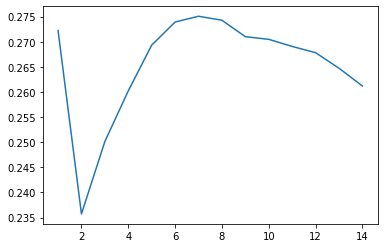

In [147]:
plt.plot(range(1, 15, 1), scores_mean[1:])

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

In [211]:
#add cosine metric
my_clf = MyKNeighborsClassifier(n_neighbors = 7, algorithm='brute', metric="cosine")
scores = cross_validate(my_clf, X, target, cv = 3, scoring = "accuracy")
scores

{'fit_time': array([0.61607528, 0.58656764, 0.58004761]),
 'score_time': array([4.25671411, 4.51514101, 4.2002871 ]),
 'test_score': array([0.3552492 , 0.35348714, 0.35481305])}

In [212]:
#add TfidfVectorizer metric
vectorizer = TfidfVectorizer(min_df = 0.003)
X = vectorizer.fit_transform(data).toarray()
scores = cross_validate(my_clf, X, target, cv = 3, scoring = "accuracy")
scores

{'fit_time': array([0.74999714, 0.7279942 , 0.76500249]),
 'score_time': array([5.55904579, 6.76388788, 7.06217575]),
 'test_score': array([0.45970308, 0.47759215, 0.45558207])}

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [213]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [214]:
data_test = newsgroups["data"]
target_test = newsgroups["target"]

In [215]:
X_test = vectorizer.transform(data_test).toarray()

Параметр **n_neighbors** для случая метрики cosine и векторайзера TfidfVectorizer подбирался аналогично тому, как это делалось выше для CountVectorizer.

In [220]:
my_clf = MyKNeighborsClassifier(n_neighbors = 300, algorithm='brute', metric="cosine")
sklearn_clf = KNeighborsClassifier(n_neighbors = 300, algorithm='brute', metric="cosine")
my_clf.fit(X, target)
sklearn_clf.fit(X, target)
print(accuracy_score(my_clf.predict(X_test), target_test))
print(accuracy_score(sklearn_clf.predict(X_test), target_test))

0.5947955390334573
0.38382899628252787


**Замечание:** качество на тестовой выборке может несколько отличаться от валидации, так как гиперпараметр (число соседей) подбирался именно на тренировочной выборке, хотя и с использованием валидации.